In [2]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
import warnings 
warnings.filterwarnings('ignore')


In [3]:
df2=pd.read_csv(r"C:\Users\Priyanshul\OneDrive\Desktop\Hackathon\stock-market-prediction-and-sentimental-analysis\update_data.csv",index_col='Date',parse_dates=True,infer_datetime_format=True)
df1 = pd.read_csv(r"C:\Users\Priyanshul\OneDrive\Desktop\Hackathon\stock-market-prediction- and-sentimental-analysis\updated1.csv\Combined_News_DJIA(train).csv",parse_dates=True,infer_datetime_format=True)

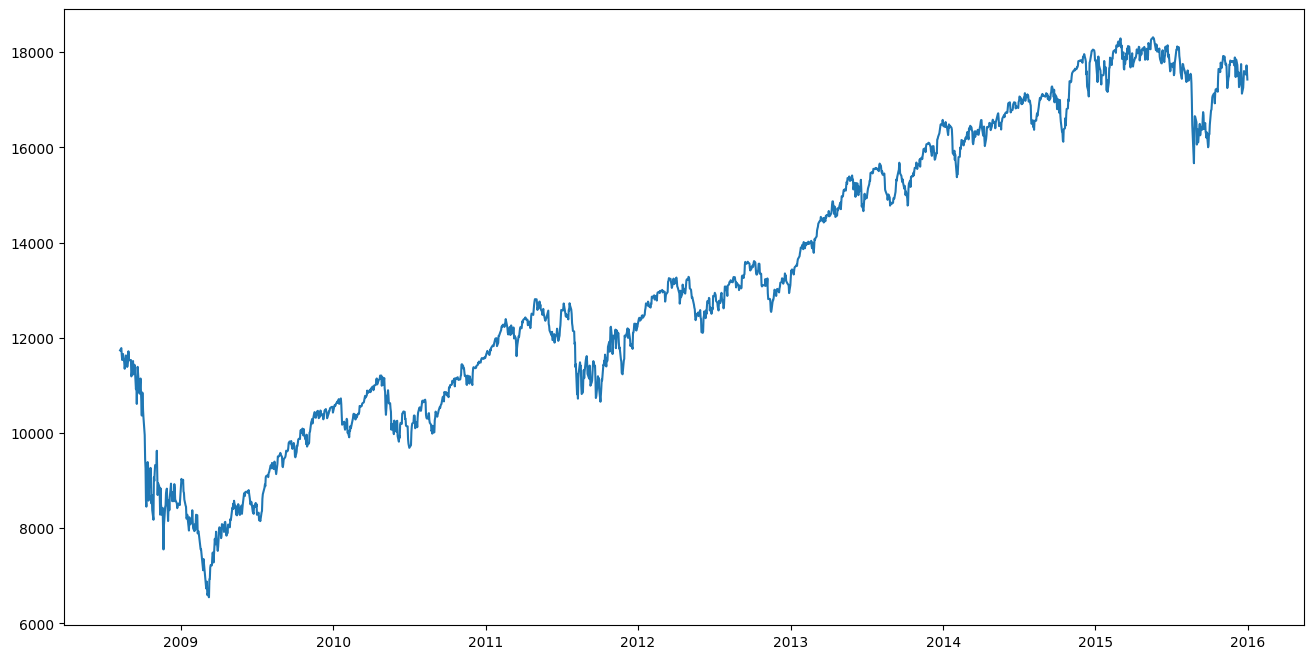

In [4]:
plt.figure(figsize=(16,8))
plt.plot(df2['Close'], label='Close Price history')

In [5]:
df1.loc[:, 'Date'] = pd.to_datetime(df1['Date'])
merge=df1.merge(df2,how='inner',on='Date')

In [6]:
merge.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969


In [7]:
headlines = []

for row in range(0,len(merge.index)):
    headlines.append(' '.join( str(x) for x in merge.iloc[row,2:27]))

In [8]:
headlines[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

In [9]:
clean_headlines = []

for i in range(0,len(headlines)):
    clean_headlines.append(re.sub("b[(')]",' ',headlines[i]))
    clean_headlines[i]= re.sub('b[(")]',' ',clean_headlines[i])
    clean_headlines[i]= re.sub("\'",' ',clean_headlines[i])

In [10]:
clean_headlines[0]

' Georgia  downs two Russian warplanes  as countries move to brink of war"  BREAKING: Musharraf to be impeached.   Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)   Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire   Afghan children raped with  impunity,  U.N. official says - this is sick, a three year old was raped and they do nothing"  150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.   Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO s side"  The  enemy combatent  trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it."  Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]   Did the U.S. Prep Georgia for War with Russia?   Rice Gives Green Light for 

In [11]:
merge['Combined_news']=clean_headlines

In [12]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [13]:
merge['Subjectivity']=merge['Combined_news'].apply(getSubjectivity)
merge['Polarity']=merge['Combined_news'].apply(getPolarity)

<Axes: >

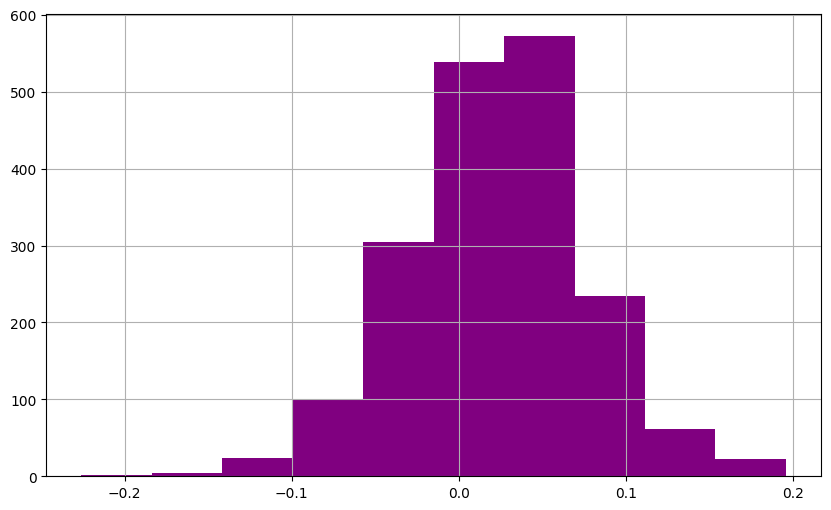

In [14]:
plt.figure(figsize = (10,6))
merge['Polarity'].hist(color = 'purple')

<Axes: >

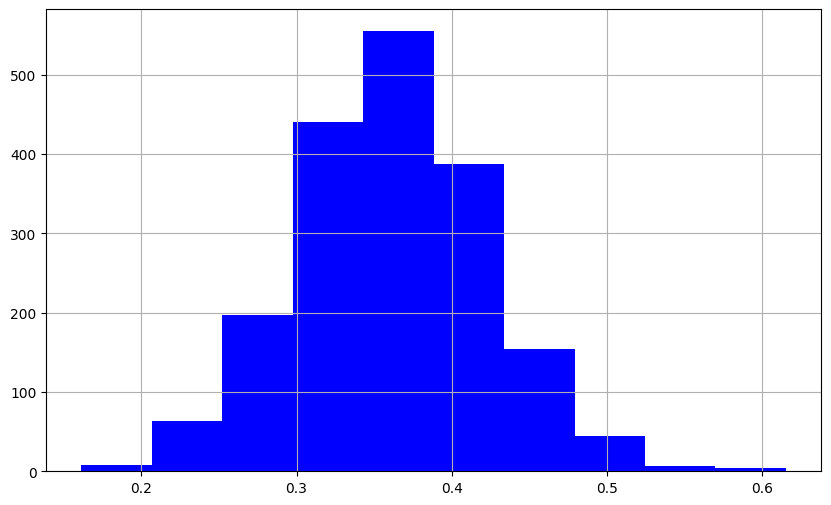

In [15]:
plt.figure(figsize = (10,6))
merge['Subjectivity'].hist(color = 'blue')

In [16]:
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [17]:
compound = []
neg = []
pos = []
neu = []
SIA=0

for i in range(0,len(merge['Combined_news'])):
    SIA = getSIA(merge['Combined_news'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

In [18]:
merge['Compound']=compound
merge['Negative']=neg
merge['Positive']=pos
merge['Neutral']=neu

In [19]:
df_final = merge[['Date','Open','High','Low','Close','Volume','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df_final

,Date,Open,High,Low,Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2008-08-08,11432.08984,11759.95996,11388.04004,11734.32031,212830000,0.267549,-0.048568,-0.9982,0.233,0.726,0.041
1,2008-08-11,11729.66992,11867.11035,11675.53027,11782.34961,183190000,0.374806,0.121956,-0.9858,0.188,0.724,0.088
2,2008-08-12,11781.70020,11782.34961,11601.51953,11642.46973,173590000,0.518785,-0.046530,-0.9715,0.126,0.819,0.055
3,2008-08-13,11632.80957,11633.78027,11453.33984,11532.95996,182550000,0.364021,0.011398,-0.9809,0.143,0.793,0.064
4,2008-08-14,11532.07031,11718.28027,11450.88965,11615.92969,159790000,0.375099,0.040677,-0.9882,0.188,0.719,0.093
...,...,...,...,...,...,...,...,...,...,...,...,...
1858,2015-12-24,17593.25977,17606.33984,17543.94922,17552.16992,40350000,0.317617,0.052091,-0.9966,0.158,0.803,0.039
1859,2015-12-28,17535.66016,17536.90039,17437.33984,17528.26953,59770000,0.284549,-0.030512,-0.9944,0.144,0.830,0.026
1860,2015-12-29,17547.36914,17750.01953,17547.36914,17720.98047,69860000,0.359273,0.101038,-0.9920,0.143,0.817,0.039
1861,2015-12-30,17711.93945,17714.13086,17588.86914,17603.86914,59760000,0.334222,-0.010854,-0.9917,0.189,0.724,0.087


In [20]:
data=df_final[['Date','Open','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
data.index=data['Date']
data.drop('Date', axis=1, inplace=True)
data['Close']=df_final['Close'].values
data

,Open,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Close
Date,,,,,,,,
2008-08-08,11432.08984,0.267549,-0.048568,-0.9982,0.233,0.726,0.041,11734.32031
2008-08-11,11729.66992,0.374806,0.121956,-0.9858,0.188,0.724,0.088,11782.34961
2008-08-12,11781.70020,0.518785,-0.046530,-0.9715,0.126,0.819,0.055,11642.46973
2008-08-13,11632.80957,0.364021,0.011398,-0.9809,0.143,0.793,0.064,11532.95996
2008-08-14,11532.07031,0.375099,0.040677,-0.9882,0.188,0.719,0.093,11615.92969
...,...,...,...,...,...,...,...,...
2015-12-24,17593.25977,0.317617,0.052091,-0.9966,0.158,0.803,0.039,17552.16992
2015-12-28,17535.66016,0.284549,-0.030512,-0.9944,0.144,0.830,0.026,17528.26953
2015-12-29,17547.36914,0.359273,0.101038,-0.9920,0.143,0.817,0.039,17720.98047


In [21]:
test_req=data.iloc[1803:1863,0:7]
test_req.head()

,Open,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
Date,,,,,,,
2015-10-07,16805.41992,0.342576,0.089495,-0.9642,0.135,0.764,0.101
2015-10-08,16904.16992,0.317868,-0.009718,-0.9943,0.182,0.750,0.068
2015-10-09,17054.68945,0.346511,0.014414,-0.9603,0.115,0.809,0.076
2015-10-12,17082.28906,0.419784,0.012894,-0.9933,0.151,0.796,0.053
2015-10-13,17113.55078,0.352052,0.035357,-0.9840,0.149,0.795,0.055


In [22]:
dataset = data.values

train = dataset[0:1400,:]
valid = dataset[1400:,7]

In [23]:
dataset.shape

(1863, 8)

In [24]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(dataset[i-60:i,0:7])
    y_train.append(dataset[i,7])
x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
x_train.shape

(1340, 60, 7)

In [26]:
y_train = y_train.reshape(-1,1)
y_train.shape

(1340, 1)

---> SCALING THE DATA <---

In [27]:
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler2 = MinMaxScaler(feature_range=(0, 1))

x = scaler1.fit_transform(x_train[:,:,0])
y_train = scaler2.fit_transform(y_train)

In [28]:
x = x.reshape(1340,60,1)
x.shape

(1340, 60, 1)

In [29]:
x_dummy=x_train[:,:,1:7]

In [30]:
x_dummy.shape

(1340, 60, 6)

In [31]:
result = np.concatenate((x,x_dummy), axis=2)

In [32]:
result.shape

(1340, 60, 7)

In [33]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],7)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(result, y_train, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
1340/1340 [==============================] - 79s 50ms/step - loss: 0.0037
Epoch 2/10
1340/1340 [==============================] - 66s 49ms/step - loss: 0.0011
Epoch 3/10
1340/1340 [==============================] - 61s 45ms/step - loss: 0.0010
Epoch 4/10
1340/1340 [==============================] - 61s 45ms/step - loss: 7.9478e-04
Epoch 5/10
1340/1340 [==============================] - 59s 44ms/step - loss: 6.8775e-04
Epoch 6/10
1340/1340 [==============================] - 59s 44ms/step - loss: 6.2724e-04
Epoch 7/10
1340/1340 [==============================] - 63s 47ms/step - loss: 5.7396e-04
Epoch 8/10
1340/1340 [==============================] - 65s 49ms/step - loss: 5.8413e-04
Epoch 9/10
1340/1340 [==============================] - 64s 48ms/step - loss: 5.4195e-04
Epoch 10/10
1340/1340 [==============================] - 63s 47ms/step - loss: 4.9564e-04


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11600     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31851 (124.42 KB)
Trainable params: 31851 (124.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
inputs=dataset[len(data) - len(valid) - 60:,]
inputs.shape

(523, 8)

In [36]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0:7])
X_test = np.array(X_test)

In [37]:
X_test.shape

(463, 60, 7)

In [38]:
inputs  = scaler1.transform(X_test[:,:,0])

In [39]:
inputs= inputs.reshape(463,60,1)
inputs.shape

(463, 60, 1)

In [40]:
test_dummy=X_test[:,:,1:7]
inputs = np.concatenate((inputs,test_dummy), axis=2)

In [41]:
inputs.shape

(463, 60, 7)

In [42]:
closing_price = model.predict(inputs)

15/15 [==============================] - 4s 27ms/step


In [43]:
closing_price = scaler2.inverse_transform(closing_price)

In [44]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

898.5501488471721

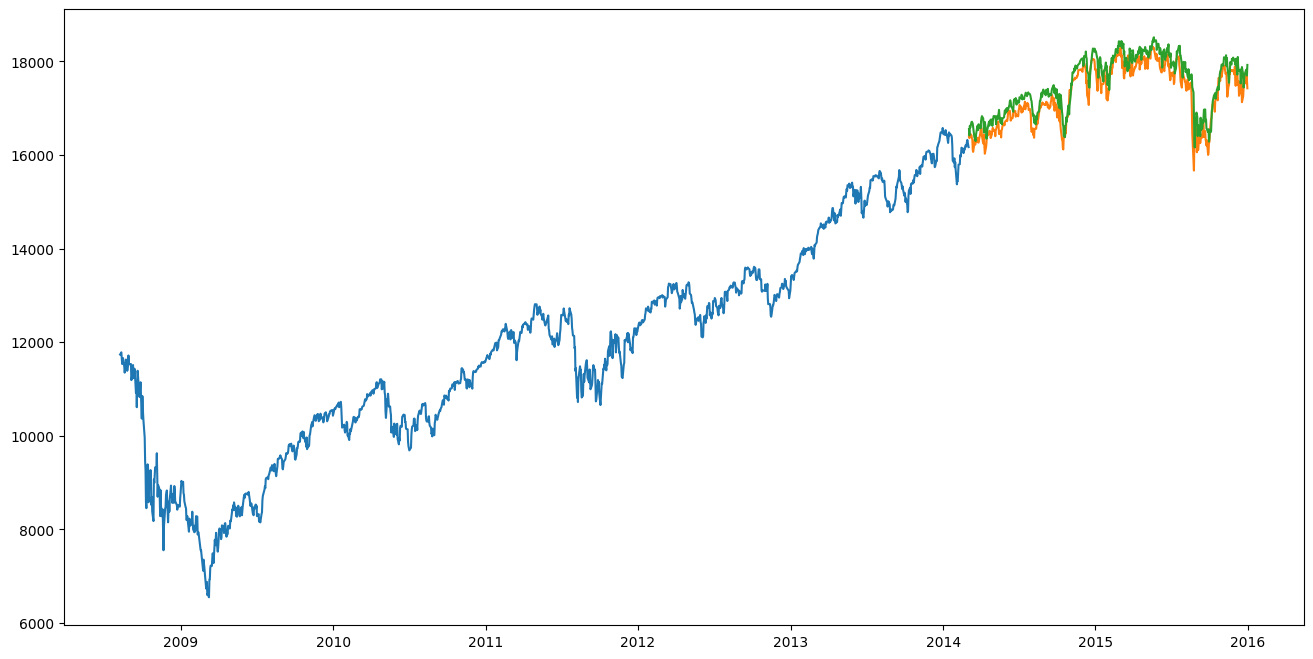

In [45]:
train = data[:1400]
valid = data[1400:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [46]:
valid.iloc[0:10, 7:9]

,Close,Predictions
Date,,
2014-03-04,16395.88086,16549.138672
2014-03-05,16360.17969,16418.304688
2014-03-06,16421.89063,16621.361328
2014-03-07,16452.72070,16581.619141
2014-03-10,16418.67969,16704.302734
2014-03-11,16351.25000,16710.480469
2014-03-12,16340.08008,16688.626953
2014-03-13,16108.88965,16668.804688
2014-03-14,16065.66992,16595.193359


In [47]:
test2=pd.read_csv(r"C:\Users\Priyanshul\OneDrive\Desktop\Hackathon\stock-market-prediction-and-sentimental-analysis\asd\Test_DJIA_Table.csv",index_col='Date',parse_dates=True,infer_datetime_format=True)
test1= pd.read_csv(r"C:\Users\Priyanshul\OneDrive\Desktop\Hackathon\stock-market-prediction-and-sentimental-analysis\asd\Test_Combined_News.csv",parse_dates=True,infer_datetime_format=True)

In [48]:
test1.loc[:, 'Date'] = pd.to_datetime(test1['Date'])
merge_test=test1.merge(test2,how='inner',on='Date')

In [49]:
test1.shape

(126, 27)

In [50]:
merge_test.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top20,Top21,Top22,Top23,Top24,Top25,Open,High,Low,Volume
0,2016-04-01,0,Saudi Arabia breaks off ties with Iran - Amid ...,Exclusive: UK Government urged to reveal its r...,China halts trading as stocks fall 7%,Earthquake measuring 6.8 magnitude strikes India,A virus linked to shrinking newborns brains is...,"New photos of SpaceX booster show sooty, but u...",Indian consulate in Afghanistan under attack b...,Iran calls off Major Hajj,...,Iranian diplomats given 48 hours to leave Saud...,BBC News: Migrant crisis: Sweden border checks...,Teachers claim the politics of austerity is le...,The Aftermath of a Muslim Cleric's Execution i...,Iran: 40 arrested for attack on Saudi embassy,"Oil prices jump over 2 pct on Saudi Arabia, Ir...",17405.48047,17405.48047,16957.63086,148060000
1,2016-05-01,1,"Dutch government backs strong encryption, cond...",ISIS Militants Strap Bomb on 4 Year-Old Boy an...,Canada proceeding with controversial $15-billi...,Brazil is heading for its worst recession sinc...,British ISIS militant's desperate plea for doc...,Malaysia's schools will start holding anti-ISI...,Saudi Arabia omitted from UK death penalty str...,ISIS executes first female journalist. One of ...,...,Mass murderer Anders Behring Breiviks court ca...,Kuwait has recalled its ambassador to Iran in ...,Britain set for first mass strike by doctors i...,First known hacker-caused power outage signals...,Kuwait becomes latest Saudi ally to downgrade ...,'Do Your Cars Emit Oxygen?' Indian Supreme Cou...,17147.50000,17195.83984,17038.60938,105750000
2,2016-06-01,0,China shuts down stock market after 15 min 7% ...,Armed suspect shot dead after trying to storm ...,Oil price falls below $35 a barrel to fresh 11...,Germans outraged by mayors advice for women af...,German public broadcaster ZDF has apologised f...,Iran accuses Saudis of bombing their embassy i...,Protesters demand Canada cancel $15B Saudi con...,"'Snooper's charter' will cost British lives, M...",...,Israel and China have signed a document of und...,Donald Trump threatens to pull 700m investment...,Israel busts Hamas terror cell planning abduct...,A working hospital in central China was demoli...,Paris to close Champs Elysees to cars one Sund...,TransCanada Corp files US$15-billion lawsuit a...,17154.83008,17154.83008,16817.61914,120250000
3,2016-07-01,0,Reports of sexual assaults on women across Eur...,Shelter forcibly converted children to Christi...,Iran Has Banned Its Citizens from Making Pilgr...,Gaddafi warned Blair his ousting would 'open d...,A Turkish firm has been selling fake life vest...,German minister says deportations possible in ...,Mao statue in China 'pulled down by authoritie...,A poacher-hunting dog in South Africa has been...,...,The UN library announced its most-checked-out ...,One third of the worlds freshwater fish are at...,"Nuclear weapons risk greater than in cold war,...","North Korea Claims That It Tested the ""H-Bomb ...",UK - DWP told woman she was not ill enough for...,Venezuela's new parliament removes pictures of...,16888.35938,16888.35938,16463.63086,176240000
4,2016-08-01,0,El Chapo' Being Taken to Same Prison He Escape...,El Chapo has been caught,At least 231 children abused at Catholic boys ...,North Korea has defended its latest nuclear te...,A group of United Nations' experts have warned...,Gunman opens fire on hotel popular with wester...,French Proposal to Strip Citizenship Over Terr...,Hungary will never support EU sanctions agains...,...,Iranian Soccer Player Jailed Over Photos With ...,Saudi Arabia executions: Philip Hammond condem...,"Venezuela's Economy Czar: ""Inflation Does Not ...","Seychelles, in a first-ever debt restructuring...","A Germans Video Likens Mao to Hitler, and Chin...","Cereal harvests across world ""fall by 10% in 5...",16519.16992,16651.89063,16314.57031,141850000


In [51]:
headlines_test = []

for row in range(0,len(merge_test.index)):
    headlines_test.append(' '.join( str(x) for x in merge_test.iloc[row,2:27]))

In [52]:
clean_headlines_test = []

for i in range(0,len(headlines_test)):
    clean_headlines_test.append(re.sub("b[(')]",' ',headlines_test[i]))
    clean_headlines_test[i]= re.sub('b[(")]',' ',clean_headlines_test[i])
    clean_headlines_test[i]= re.sub("\'",' ',clean_headlines_test[i])

In [53]:
merge_test['Combined_news']=clean_headlines_test

In [54]:
merge_test['Subjectivity']=merge_test['Combined_news'].apply(getSubjectivity)
merge_test['Polarity']=merge_test['Combined_news'].apply(getPolarity)

In [55]:
compound = []
neg = []
pos = []
neu = []
SIA=0

for i in range(0,len(merge_test['Combined_news'])):
    SIA = getSIA(merge_test['Combined_news'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

In [56]:
merge_test['Compound']=compound
merge_test['Negative']=neg
merge_test['Positive']=pos
merge_test['Neutral']=neu

In [57]:
df_final_test = merge_test[['Date','Open','High','Low','Volume','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df_final_test

,Date,Open,High,Low,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2016-04-01,17405.48047,17405.48047,16957.63086,148060000,0.390697,0.120378,-0.9974,0.187,0.784,0.029
1,2016-05-01,17147.50000,17195.83984,17038.60938,105750000,0.401713,0.062958,-0.9979,0.200,0.732,0.067
2,2016-06-01,17154.83008,17154.83008,16817.61914,120250000,0.330374,-0.080193,-0.9973,0.220,0.742,0.039
3,2016-07-01,16888.35938,16888.35938,16463.63086,176240000,0.502782,0.018036,-0.9913,0.152,0.770,0.078
4,2016-08-01,16519.16992,16651.89063,16314.57031,141850000,0.386780,0.038722,-0.9938,0.140,0.813,0.047
...,...,...,...,...,...,...,...,...,...,...,...
121,2016-06-27,17355.21094,17355.21094,17063.08008,138740000,0.352311,-0.014015,-0.9618,0.144,0.760,0.096
122,2016-06-28,17190.50977,17409.72070,17190.50977,112190000,0.352649,0.046560,-0.9571,0.131,0.768,0.101
123,2016-06-29,17456.01953,17704.50977,17456.01953,106380000,0.389617,0.052622,-0.9975,0.225,0.685,0.090
124,2016-06-30,17712.75977,17930.60938,17711.80078,133030000,0.382566,0.011243,-0.9977,0.200,0.740,0.060


In [58]:
data_test=df_final_test[['Date','Open','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
data_test.index=data_test['Date']
data_test.drop('Date', axis=1, inplace=True)

data_test

,Open,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
Date,,,,,,,
2016-04-01,17405.48047,0.390697,0.120378,-0.9974,0.187,0.784,0.029
2016-05-01,17147.50000,0.401713,0.062958,-0.9979,0.200,0.732,0.067
2016-06-01,17154.83008,0.330374,-0.080193,-0.9973,0.220,0.742,0.039
2016-07-01,16888.35938,0.502782,0.018036,-0.9913,0.152,0.770,0.078
2016-08-01,16519.16992,0.386780,0.038722,-0.9938,0.140,0.813,0.047
...,...,...,...,...,...,...,...
2016-06-27,17355.21094,0.352311,-0.014015,-0.9618,0.144,0.760,0.096
2016-06-28,17190.50977,0.352649,0.046560,-0.9571,0.131,0.768,0.101
2016-06-29,17456.01953,0.389617,0.052622,-0.9975,0.225,0.685,0.090


In [59]:
merged_df_test= pd.concat([test_req, data_test], ignore_index=True)
merged_df_test.head()

,Open,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,16805.41992,0.342576,0.089495,-0.9642,0.135,0.764,0.101
1,16904.16992,0.317868,-0.009718,-0.9943,0.182,0.750,0.068
2,17054.68945,0.346511,0.014414,-0.9603,0.115,0.809,0.076
3,17082.28906,0.419784,0.012894,-0.9933,0.151,0.796,0.053
4,17113.55078,0.352052,0.035357,-0.9840,0.149,0.795,0.055


In [60]:
#data_test.shape
merged_df_test.shape

(186, 7)

In [61]:
test_x = []
for i in range(60, merged_df_test.shape[0]):
    test_x.append(merged_df_test.iloc[i-60:i, 0:7].values)  # Assuming data_test is a DataFrame
test_x= np.array(test_x)

In [62]:
test_x.shape

(126, 60, 7)

In [63]:
inputs_test  = scaler1.transform(test_x[:,:,0])

In [64]:
inputs_test= inputs_test.reshape(126,60,1)
inputs_test.shape

(126, 60, 1)

In [65]:
dummy_test=test_x[:,:,1:7]
inputs_test = np.concatenate((inputs_test,dummy_test), axis=2)

In [66]:
inputs_test.shape

(126, 60, 7)

In [67]:
closing_price_test = model.predict(inputs_test)

4/4 [==============================] - 0s 28ms/step


In [68]:
closing_price_test = scaler2.inverse_transform(closing_price_test)

In [69]:
closing_price_test.shape

(126, 1)

In [70]:
pred=closing_price_test*10**5

In [71]:
pred

array([[1.78057344e+09],
       [1.76038223e+09],
       [1.74376992e+09],
       [1.75058555e+09],
       [1.71665449e+09],
       [1.68726895e+09],
       [1.67224844e+09],
       [1.67154961e+09],
       [1.68274043e+09],
       [1.65232090e+09],
       [1.67013086e+09],
       [1.62980156e+09],
       [1.63196416e+09],
       [1.60857490e+09],
       [1.61622598e+09],
       [1.63799502e+09],
       [1.61100322e+09],
       [1.64311953e+09],
       [1.62841201e+09],
       [1.63777646e+09],
       [1.66964062e+09],
       [1.66491855e+09],
       [1.64164629e+09],
       [1.66337930e+09],
       [1.66367207e+09],
       [1.64355547e+09],
       [1.63208496e+09],
       [1.63136738e+09],
       [1.62275068e+09],
       [1.58070840e+09],
       [1.59692695e+09],
       [1.63670645e+09],
       [1.66828652e+09],
       [1.66393828e+09],
       [1.66455938e+09],
       [1.68883555e+09],
       [1.66285781e+09],
       [1.68099648e+09],
       [1.69071523e+09],
       [1.68954062e+09],


In [72]:
#pred_df = pd.DataFrame(pred, columns=['Predicted_Close'])

#pred_df.to_csv('predicted_close.csv', index=False)

#print("CSV file saved successfully!")

In [73]:
pred=pred.reshape(-1)
submission_df = pd.DataFrame({'Id': range(1, 127), 'Close': pred})
submission_df.to_csv(r"C:\Users\Priyanshul\OneDrive\Desktop\Hackathon\stock-market-prediction-and-sentimental-analysis\asd.csv")